___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 7: Supervised learning

## Lab work 7



#### Мета: 

* навчитися використовувати моделі з учителем

### Завдання 1:

Для цього завдання ми будемо вивчати загальнодоступні дані з [LendingClub.com](www.lendingclub.com). 

Кредитний клуб пов'язує людей, яким потрібні гроші (позичальники), та людей, які мають гроші (інвесторів). Сподіваємось, як інвестор ви хотіли б інвестувати в людей, які продемонстрували, що вони мають високу ймовірність повернути вам гроші. Ми спробуємо створити модель, яка допоможе це передбачити.

Кредитний клуб мав [дуже цікавий 2016 рік](https://en.wikipedia.org/wiki/Lending_Club#2016), тож давайте перевіримо деякі їх дані.

Ми використовуватимемо дані про позики за 2007-2010 роки та намагатимемося класифікувати та прогнозувати, чи повертав позичальник їх повністю.

Ось що представляють стовпці:
* `credit.policy`: 1, якщо клієнт відповідає критеріям андеррайтингу кредитів LendingClub.com, і 0 в іншому випадку.

* `purpose`: мета позики (приймає значення "кредитна_карта", "консолідація боргу", "освітня", "основна_покупка", "малий бізнес" та "всі_інші").

* `int.rate`: процентна ставка позики, пропорційно (ставка 11% зберігатиметься як 0,11). Позичальникам, які LendingClub.com вважає більш ризикованими, призначаються вищі процентні ставки.

* `installment`: щомісячні виплати позичальника, якщо позика фінансується.

* `log.annual.inc`: журнал річного доходу позичальника, який самостійно звітується.

* `dti`: відношення боргу до доходу позичальника (сума боргу, поділена на річний дохід).

* `fico`: кредитний рейтинг позичальника FICO.

* `days.with.cr.line`: кількість днів, коли позичальник мав кредитну лінію.

* `revol.bal`: кредитний залишок позичальника (сума не виплачена в кінці циклу виставлення рахунків за кредитною карткою).

* `revol.util`: коефіцієнт використання кридитної лінії позичальника (сума використаної кредитної лінії відносно загальної кількості доступних кредитів).

* `inq.last.6mths`: кількість запитів позичальників з боку кредиторів за останні 6 місяців.

* `delinq.2yrs`: кількість разів, протягом яких позичальник прострочував платежі протягом останніх 2 років понад 30 днів.

* `pub.rec`: кількість публічних записів (заяви про банкрутство, податкова застава або рішення).

Алгоритм виконання та проміжні завдання:
1. Відкрийте файл та виведіть описову статистику

2. Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.

3. Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

4. Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції

5. purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies

6. Розбийте датасет на тестві та трейнові дані

7. Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost

8. Для кожної з моделей виведіть матрицю, основні метрики

8. *Використейте бібіотеку dtreeviz для візуалізації (там, де актуально)

9. Використайте ансамбель voting для всіх моделей

10. Порівняйте результати моделей та зробіть висновки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

1. Відкрийте файл та виведіть описову статистику

In [2]:
Credit = pd.read_csv('loan_data.csv')
Credit.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


2. Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.

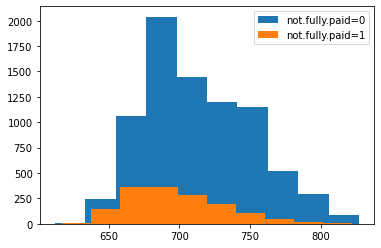

In [3]:
plt.hist(Credit[Credit['not.fully.paid']==0]['fico'], label = 'not.fully.paid=0')
plt.hist(Credit[Credit['not.fully.paid']==1]['fico'], label = 'not.fully.paid=1')
plt.legend()

3. Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

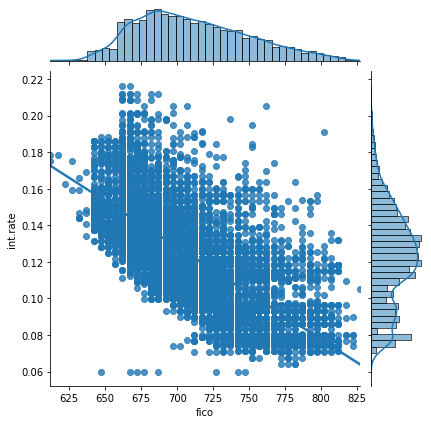

In [4]:
sb.jointplot(x = 'fico',y = 'int.rate',data = Credit,kind = 'reg')

4. Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції

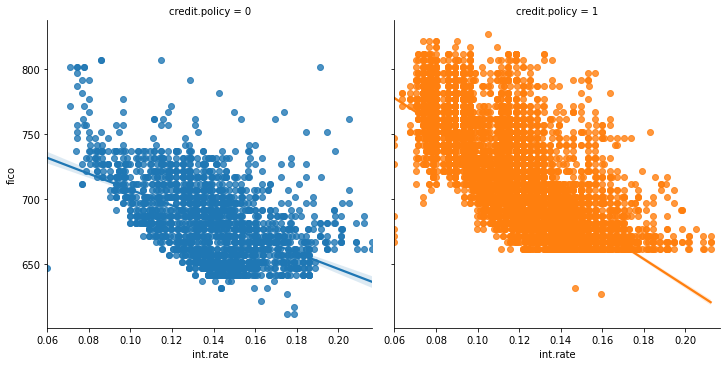

In [5]:
fg = sb.lmplot(x = 'int.rate', y = 'fico', hue = 'credit.policy', col= 'credit.policy', data=Credit)

5. purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies


In [6]:
Credit2 = pd.get_dummies(Credit, columns = ['purpose'])
Credit2

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,0,1,0,0


In [7]:
Credit2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_all_other           9578 

6. Розбийте датасет на тестові та трейнові дані


In [8]:
X = Credit2[['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid', 'purpose_all_other', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_major_purchase', 'purpose_small_business']]
y = Credit2['credit.policy']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
result_score = {}

7. Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost


In [10]:
# Дерево рішень
from sklearn.tree import DecisionTreeClassifier

m_1 = DecisionTreeClassifier(random_state=42)
m_1.fit(X_train,y_train)
print(m_1.score(X_train,y_train))
print(m_1.score(X_test,y_test))
result_score['Дерево рішень'] = round(m_1.score(X_test, y_test), 5)

1.0
0.9932150313152401


In [11]:
# Логістична регресія
from sklearn.linear_model import LogisticRegression

m_2 = LogisticRegression(random_state=42)
m_2.fit(X_train,y_train)
print(m_2.score(X_train,y_train))
print(m_2.score(X_test,y_test))
result_score['Логістична регресія'] = round(m_2.score(X_test, y_test), 5)

0.8706604019838162
0.8669102296450939


In [12]:
# random forest
from sklearn.ensemble import RandomForestClassifier

m_3 = RandomForestClassifier(random_state=42)
m_3.fit(X_train,y_train)
print(m_3.score(X_train,y_train))
print(m_3.score(X_test,y_test))
result_score['random forest'] = round(m_3.score(X_test, y_test), 5)

1.0
0.9864300626304802


In [13]:
# XGBoost
import xgboost as xgb

m_4 = xgb.XGBClassifier(n_estimators=4, max_depth=2, random_state=42)
m_4.fit(X_train,y_train)
print(m_4.score(X_train,y_train))
print(m_4.score(X_test,y_test))
result_score['XGBoost'] = round(m_4.score(X_test, y_test), 5)

[23:47:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9523623074915166
0.9446764091858038


8. Для кожної з моделей виведіть матрицю, основні метрики


In [14]:
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
# Дерево рішень
predictions = m_1.predict(X_test)
print(classification_report(y_test,predictions, digits=5))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0    0.99178   0.97312   0.98236       372
           1    0.99355   0.99806   0.99580      1544

    accuracy                        0.99322      1916
   macro avg    0.99267   0.98559   0.98908      1916
weighted avg    0.99321   0.99322   0.99319      1916

[[ 362   10]
 [   3 1541]]


In [16]:
# Логістична регресія
predictions = m_2.predict(X_test)
print(classification_report(y_test,predictions, digits=5))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0    0.83051   0.39516   0.53552       372
           1    0.87062   0.98057   0.92233      1544

    accuracy                        0.86691      1916
   macro avg    0.85056   0.68787   0.72892      1916
weighted avg    0.86283   0.86691   0.84723      1916

[[ 147  225]
 [  30 1514]]


In [17]:
# random forest
predictions = m_3.predict(X_test)
print(classification_report(y_test,predictions, digits=5))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0    0.97527   0.95430   0.96467       372
           1    0.98905   0.99417   0.99160      1544

    accuracy                        0.98643      1916
   macro avg    0.98216   0.97424   0.97814      1916
weighted avg    0.98637   0.98643   0.98637      1916

[[ 355   17]
 [   9 1535]]


In [18]:
# XGBoost
predictions = m_4.predict(X_test)
print(classification_report(y_test,predictions, digits=5))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0    1.00000   0.71505   0.83386       372
           1    0.93576   1.00000   0.96681      1544

    accuracy                        0.94468      1916
   macro avg    0.96788   0.85753   0.90033      1916
weighted avg    0.94823   0.94468   0.94100      1916

[[ 266  106]
 [   0 1544]]


8. *Використейте бібіотеку dtreeviz для візуалізації (там, де актуально)


[Text(896.9700863486842, 791.4176470588235, 'inq.last.6mths <= 3.5\ngini = 0.314\nsamples = 7662\nvalue = [1496, 6166]'),
 Text(736.6770148026316, 743.4529411764706, 'fico <= 659.5\ngini = 0.174\nsamples = 6676\nvalue = [641, 6035]'),
 Text(673.8675986842105, 695.4882352941177, 'fico <= 634.5\ngini = 0.013\nsamples = 297\nvalue = [295, 2]'),
 Text(659.1833881578947, 647.5235294117647, 'days.with.cr.line <= 1034.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(644.499177631579, 599.5588235294117, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(673.8675986842105, 599.5588235294117, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(688.5518092105264, 647.5235294117647, 'gini = 0.0\nsamples = 292\nvalue = [292, 0]'),
 Text(799.4864309210526, 695.4882352941177, 'days.with.cr.line <= 1109.5\ngini = 0.103\nsamples = 6379\nvalue = [346, 6033]'),
 Text(784.8022203947369, 647.5235294117647, 'gini = 0.0\nsamples = 135\nvalue = [135, 0]'),
 Text(814.1706414473684, 647.5235294117647, 'revol.b

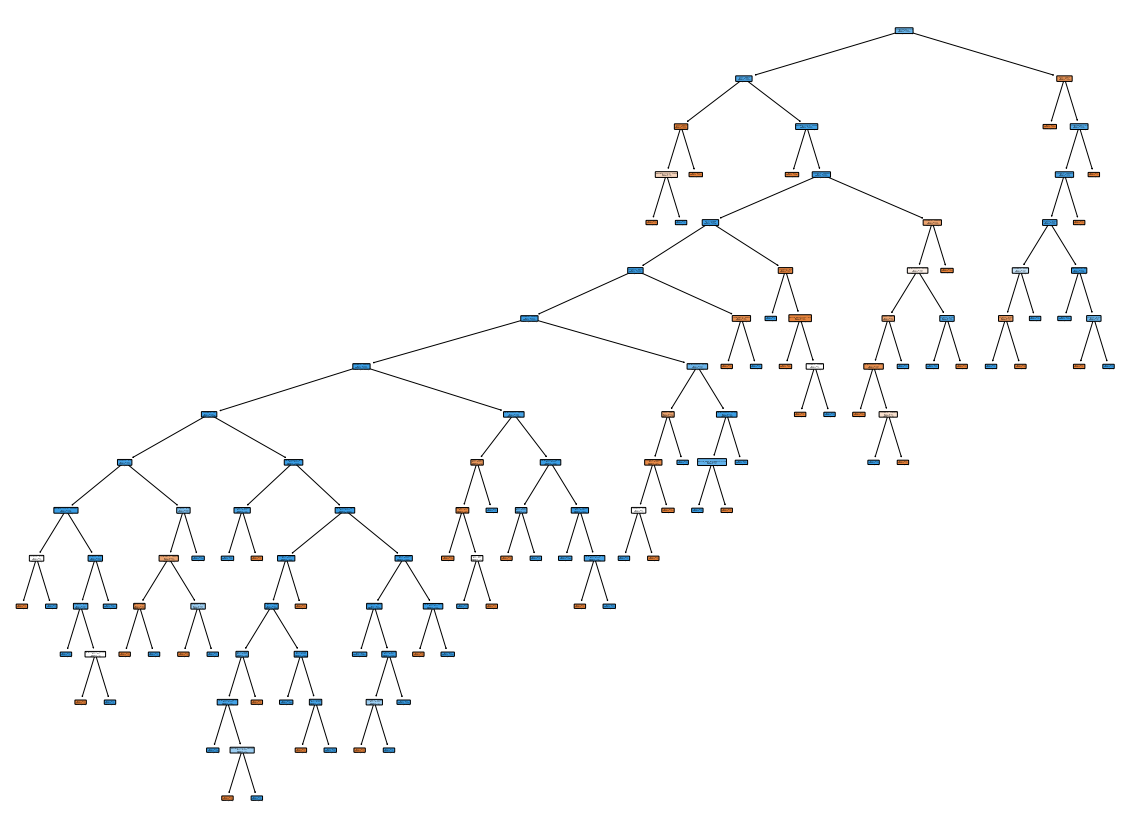

In [19]:
from sklearn import tree
plt.figure(figsize=(20,15)) 
tree.plot_tree(m_1, feature_names=['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid', 'purpose_all_other', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_major_purchase', 'purpose_small_business'], filled=True, proportion=False, rotate='deprecated', rounded=True)

9. Використайте ансамбель voting для всіх моделей


In [20]:
from sklearn.ensemble import VotingClassifier

en_vot = VotingClassifier([('m1', m_1), ('m2', m_2), ('m3', m_3), ('m4', m_4)])
en_vot.fit(X_train, y_train)
print(en_vot.score(X_train,y_train))
print(en_vot.score(X_test,y_test))
result_score['ensemble voting'] = round(en_vot.score(X_test, y_test), 5)

[23:47:32] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1.0
0.9890396659707724


In [21]:
predictions = en_vot.predict(X_test)
print(classification_report(y_test,predictions, digits=5))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0    0.98886   0.95430   0.97127       372
           1    0.98908   0.99741   0.99323      1544

    accuracy                        0.98904      1916
   macro avg    0.98897   0.97586   0.98225      1916
weighted avg    0.98904   0.98904   0.98897      1916

[[ 355   17]
 [   4 1540]]


10. Порівняйте результати моделей та зробіть висновки

In [22]:
result_score

{'Дерево рішень': 0.99322,
 'Логістична регресія': 0.86691,
 'random forest': 0.98643,
 'XGBoost': 0.94468,
 'ensemble voting': 0.98904}

Здійснивши аналіз результатів моделей, можемо зробити висновок, що найкраще для даної задачі працює модель "Дерево рішень".
Вона має найкращий показник 'accuracy', який дорівнює 0,99322.
Крім того, оскільки наша задача вирішує питання чи надавати кредит чи ні, важливим є показник recall для випадків, коли кредит не потрібно видавати.
Цей показник також є найкращим в моделі "Дерево рішень". Він дорівнює 0,97312.

### Завдання 2:

Просте завдання на обробку часових рядів.

Потрібно вивести наступну інформацію: 
1. Виведіть список унікальних міст з датасету
2. Виведіть дату початку та кінця ведення даних
3. Яка середня конценрація $NO_2$ для кожного дня тижня і міста (виведіть таблицю)?
4. Яке середнє значення для кожної години (виведіть стовбчикову діаграму)?

In [23]:
url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/data/air_quality_no2_long.csv"

In [24]:
df = pd.read_csv('air_quality_no2_long.csv')
df

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³


1. Виведіть список унікальних міст з датасету

In [25]:
print(f'Список унікальних міст датасету:',df['city'].unique()[0],',', df['city'].unique()[1],',',df['city'].unique()[2])

Список унікальних міст датасету: Paris , Antwerpen , London


2. Виведіть дату початку та кінця ведення даних

In [26]:
print(f'Дата початку ведення даних -', df['date.utc'].min().split()[0])
print(f'Дата кінця ведення даних -', df['date.utc'].max().split()[0])

Дата початку ведення даних - 2019-05-07
Дата кінця ведення даних - 2019-06-21


3. Яка середня конценрація $NO_2$ для кожного дня тижня і міста (виведіть таблицю)?

In [27]:
df['date.utc'] = pd.to_datetime(df['date.utc'])

In [28]:
df['weekday'] = df['date.utc'].dt.dayofweek

In [29]:
df['hour'] = df['date.utc'].dt.hour

In [30]:
df

,city,country,date.utc,location,parameter,value,unit,weekday,hour
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,4,0
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,3,23
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,3,22
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,3,21
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,3,20
...,...,...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³,1,6
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³,1,4
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³,1,3
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³,1,2


In [31]:
df.groupby(['city', 'weekday'])[['value']].mean()

value
city      weekday           
Antwerpen 0        27.875000
          1        22.214286
          2        21.125000
          3        27.500000
          4        28.400000
          5        33.500000
          6        21.896552
London    0        23.969697
          1        24.885714
          2        23.460432
          3        24.780142
          4        26.446809
          5        24.977612
          6        24.859155
Paris     0        24.856250
          1        30.999359
          2        29.165753
          3        28.600690
          4        31.617986
          5        25.266154
          6        23.274306

4. Яке середнє значення для кожної години (виведіть стовбчикову діаграму)?

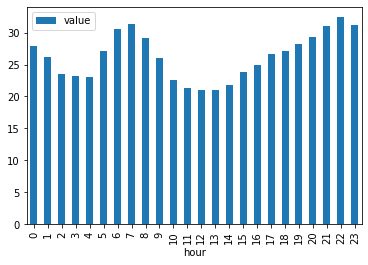

In [32]:
_ = df.groupby(['hour'])[['value']].mean().plot.bar()